## **Mini Project Advanced Statistical A.**

Initial Data Exploration

In [ ]:
import pandas as pd
data=pd.read_csv('AAPL, 1D 01012007-12072023.csv')
data.head()

,volume,vwap,open,close,high,low,time,transactions
0,1.245445e+09,3.0302,3.0821,2.9929,3.0921,2.9250,1167800400,189737
1,8.554834e+08,3.0403,3.0018,3.0593,3.0696,2.9936,1167886800,136333
2,8.352580e+08,3.0426,3.0632,3.0375,3.0786,3.0143,1167973200,141050
3,7.974138e+08,3.0683,3.0700,3.0525,3.0904,3.0457,1168232400,130547
4,3.352007e+09,3.1946,3.0875,3.3061,3.3207,3.0411,1168318800,569578


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4159 entries, 0 to 4158
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   volume        4159 non-null   float64
 1   vwap          4159 non-null   float64
 2   open          4159 non-null   float64
 3   close         4159 non-null   float64
 4   high          4159 non-null   float64
 5   low           4159 non-null   float64
 6   time          4159 non-null   int64  
 7   transactions  4159 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 260.1 KB


In [ ]:
#convert time from Unix to date
data['time']=pd.to_datetime(data['time'],unit='s').dt.strftime('%Y-%m-%d')


#convert volume to integer
data['volume']=data['volume'].astype('int64')

data.head()

,volume,vwap,open,close,high,low,time,transactions
0,1245444592,3.0302,3.0821,2.9929,3.0921,2.9250,2007-01-03,189737
1,855483384,3.0403,3.0018,3.0593,3.0696,2.9936,2007-01-04,136333
2,835258032,3.0426,3.0632,3.0375,3.0786,3.0143,2007-01-05,141050
3,797413848,3.0683,3.0700,3.0525,3.0904,3.0457,2007-01-08,130547
4,3352006588,3.1946,3.0875,3.3061,3.3207,3.0411,2007-01-09,569578


In [ ]:
data['year']=pd.to_datetime(data['time']).dt.year
data['month']=pd.to_datetime(data['time']).dt.month
data['day']=pd.to_datetime(data['time']).dt.day
data.head()

,volume,vwap,open,close,high,low,time,transactions,year,month,day
0,1245444592,3.0302,3.0821,2.9929,3.0921,2.9250,2007-01-03,189737,2007,1,3
1,855483384,3.0403,3.0018,3.0593,3.0696,2.9936,2007-01-04,136333,2007,1,4
2,835258032,3.0426,3.0632,3.0375,3.0786,3.0143,2007-01-05,141050,2007,1,5
3,797413848,3.0683,3.0700,3.0525,3.0904,3.0457,2007-01-08,130547,2007,1,8
4,3352006588,3.1946,3.0875,3.3061,3.3207,3.0411,2007-01-09,569578,2007,1,9


Data Visualization

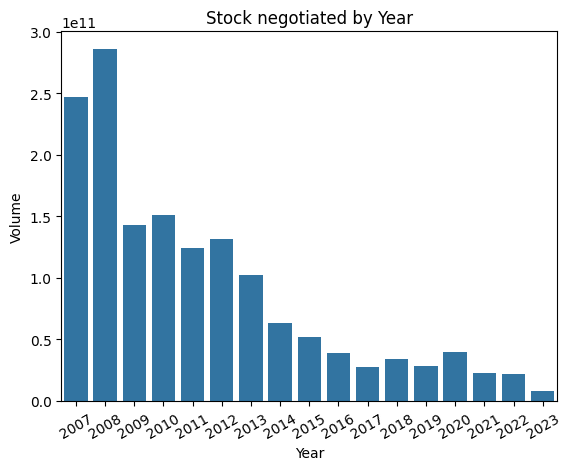

In [ ]:
#group by year and sum volume
data_by_year=data.groupby('year')['volume'].sum().reset_index()

import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x='year',y='volume',data=data_by_year)
plt.title('Stock negotiated by Year')
plt.xlabel('Year')
plt.ylabel('Volume')
#rotation
plt.xticks(rotation=30)
plt.show()

Text(0, 0.5, 'Value')

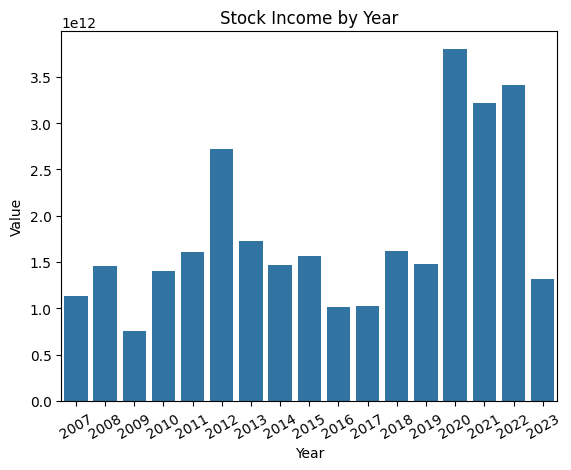

In [ ]:
#add a column of value that is volume*vwap for each year
data_by_year['value']=data_by_year['volume']*data.groupby('year')['vwap'].mean().reset_index()['vwap']
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x='year',y='value',data=data_by_year)
#rotation
plt.xticks(rotation=30)
plt.title('Stock Income by Year')
plt.xlabel('Year')
plt.ylabel('Value')

In [ ]:

import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(
    x=data['year'],
    open=data['open'],
    high=data['high'],
    low=data['low'],
    close=data['close']
)])

fig.update_layout(
    title="AAPL",
    xaxis_title="year",
    yaxis_title="price"
)


fig.show()

Text(0, 0.5, 'VWAP')

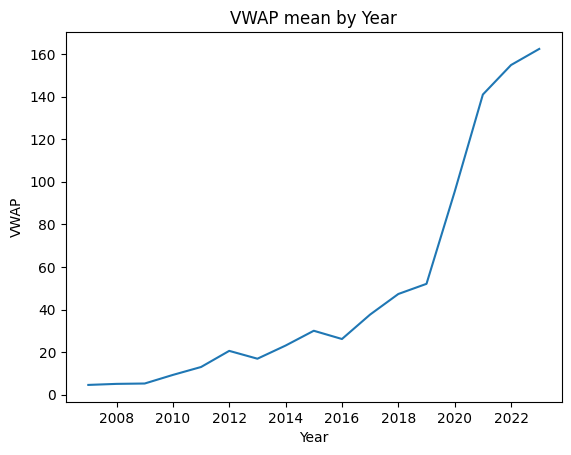

In [ ]:
#calculate mean for vwap agrupating data by year. ej mean of vwap for 2007.create another column
data_by_year=data.groupby('year')['vwap'].mean().reset_index()

#graph data_by_year
import matplotlib.pyplot as plt
import seaborn as sns
sns.lineplot(x='year',y='vwap',data=data_by_year)
plt.title('VWAP mean by Year')
plt.xlabel('Year')
plt.ylabel('VWAP')

In [ ]:
import scipy
import scipy.stats as stats
import numpy as np
from scipy.stats import ttest_ind

mean_scipy = stats.tmean(data['vwap'])
median_scipy = np.median(data['vwap'])
variance_scipy = stats.tvar(data['vwap'])
std_dev_scipy = stats.tstd(data['vwap'])
print("Mean:", mean_scipy)
print("Median:", median_scipy)
print("Variance:", variance_scipy)
print("Standard Deviation:", std_dev_scipy)


Mean: 46.39138203895167
Median: 25.8852
Variance: 2527.832772746457
Standard Deviation: 50.27755734665774


In [ ]:
#Analyze closing prices with a moving average.


In [ ]:
#average closing prices across years
data_by_year=data.groupby('year')['close'].mean().reset_index()

print(data_by_year)

#mean of all close
mean_close=data['close'].mean()
print("mean of all column mean close for all years: ", mean_close)

data_by_year['close']

import numpy as np
from scipy import stats


t_statistic, p_value = stats.ttest_1samp(data_by_year['close'], mean_close)
print("t-statistic:", t_statistic)
print("p-value:", p_value)


alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

    year       close
0   2007    4.581222
1   2008    5.070867
2   2009    5.243364
3   2010    9.280176
4   2011   13.000154
5   2012   20.573207
6   2013   16.879816
7   2014   23.066142
8   2015   30.009967
9   2016   26.151002
10  2017   37.637764
11  2018   47.263357
12  2019   52.063983
13  2020   95.346759
14  2021  140.989325
15  2022  154.835060
16  2023  162.474999
mean of all column mean close for all years:  46.39605770617938
t-statistic: 0.24965227086053257
p-value: 0.8060331632085607
Fail to reject the null hypothesis


In [ ]:
from scipy import stats

# Example: Gaussian Distribution
mu, sigma = mean_scipy, std_dev_scipy  # mean and standard deviation
gaussian_dist = stats.norm(mu, sigma)
print("PDF at x=std_dev_scipy:", gaussian_dist.pdf(std_dev_scipy))


PDF at x=std_dev_scipy: 0.007911130797539065


In [ ]:
data['daily_returns'] = data['close'].pct_change()
_, p_value_normality = stats.shapiro(data['daily_returns'].dropna())
print("p-value for normality:", p_value_normality)

p-value for normality: 6.180858977992611e-38


In [ ]:
#Advanced Statistical Techniques
corr = np.corrcoef(data['close'].dropna(), data['volume'].dropna())[0, 1]
print('correlation between close price and volume:',corr)


correlation between close price and volume: -0.5174117560070657


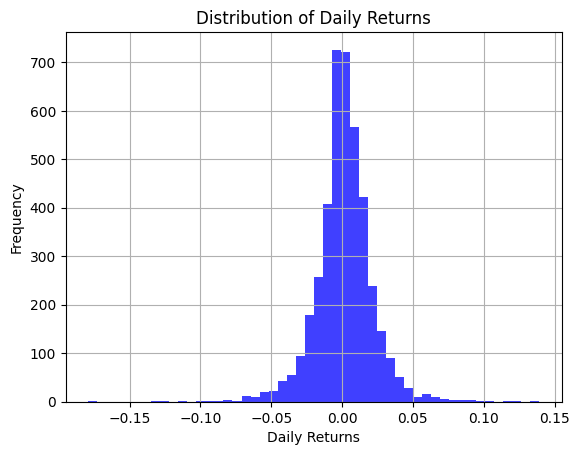

In [ ]:
import matplotlib.pyplot as plt
plt.hist(data['daily_returns'].dropna(), bins=50, alpha=0.75, color='blue')

plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Returns')
plt.grid(True)
plt.show()

# **Checking normal distribution**

In [ ]:
from scipy import stats
stat, p_value = stats.shapiro(data['daily_returns'].dropna())
print(f'Shapiro-Wilk Statistic: {stat}')
print(f'p-value: {p_value}')
alpha = 0.05
if p_value > alpha:
    print("The data is normally distributed (fail to reject the null hypothesis).")
else:
    print("The data is not normally distributed (reject the null hypothesis).")

Shapiro-Wilk Statistic: 0.940666076855671
p-value: 6.180858977992611e-38
The data is not normally distributed (reject the null hypothesis).
